they are now:
Dn: (0.18198273344376414, -0.0724757777532743, 0.11674377997252403)
En:(6.356258419070297, -2.1299267652880856, 1.2609679956841222)
Fn:(0.0, 0.0, 0.0)
Gn:(0.0, 0.0, 0.0)
they are now:
Dn: (0.18198273344376414, -0.0724757777532743, 0.11674377997252403)
En:(6.356258419070297, -2.1299267652880856, 1.2609679956841222)
Fn:(0.0, 0.0, 0.0)
Gn:(0.0, 0.0, 0.0)
they are now:
Dn: (0.18198273344376414, -0.0724757777532743, 0.11674377997252403)
En:(6.356258419070297, -2.1299267652880856, 1.2609679956841222)
Fn:(0.0, 0.0, 0.0)
Gn:(0.0, 0.0, 0.0)
they are now:
Dn: (0.18198273344376414, -0.0724757777532743, 0.11674377997252403)
En:(6.356258419070297, -2.1299267652880856, 1.2609679956841222)
Fn:(0.0, 0.0, 0.0)
Gn:(0.0, 0.0, 0.0)
they are now:
Dn: (0.18198273344376414, -0.0724757777532743, 0.11674377997252403)
En:(6.356258419070297, -2.1299267652880856, 1.2609679956841222)
Fn:(0.0, 0.0, 0.0)
Gn:(0.0, 0.0, 0.0)
they are now:
Dn: (0.1819827361555182, -0.0724757777532743, 0.11674377997252403)

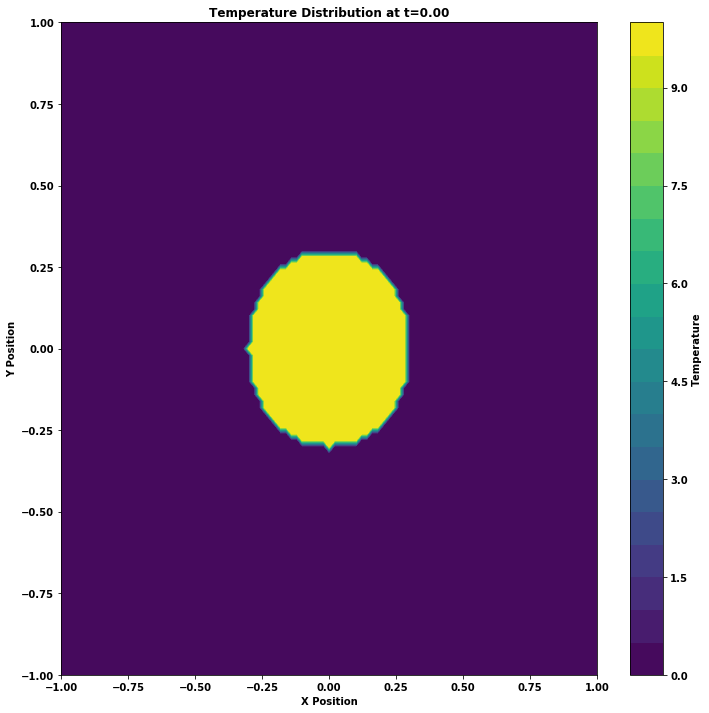

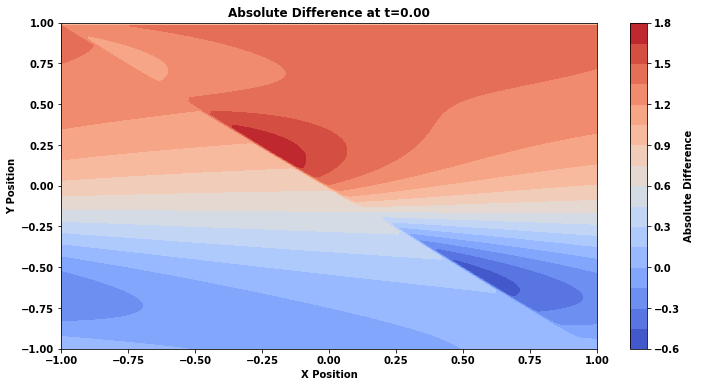

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from findiff import FinDiff
from scipy.optimize import curve_fit
from matplotlib.widgets import Slider

# Define the custom temperature function with a truncated series
def temperature_function(x, y, t, E0, alpha, Dn, En, Fn, Gn, n_terms, L):
    """
    Returns the temperature at a given position (x, y) and time t, with specified parameters.
    """
    lambda_n = (np.pi * (2 * np.arange(1, n_terms + 1) - 1) / (2 * L))**2

    T = E0 / 2  # Constant term
    for n in range(1, n_terms + 1):
        sqrt_lambda_n = np.sqrt(lambda_n[n - 1])
        term = (
            (Dn[n - 1] * np.sin(sqrt_lambda_n * x) + En[n - 1] * np.cos(sqrt_lambda_n * x)) *
            (Fn[n - 1] * np.sin(sqrt_lambda_n * y) + Gn[n - 1] * np.cos(sqrt_lambda_n * y)) *
            np.exp(-alpha * lambda_n[n - 1] * t)
        )
        T += term

    return T

# Parameters for the grid and data generation
L = 1.0  # Length of the domain
Nx = 101  # Number of spatial grid points
Ny = 101  # Number of spatial grid points
x = np.linspace(-L, L, Nx)  # Spatial grid
y = np.linspace(-L, L, Ny)  # Spatial grid
Nt = 100  # Number of time steps
dt = 0.1 / Nt  # Time-step size
t_vals = np.linspace(0, (Nt - 1) * dt, Nt)
alpha = 1e-3  # Diffusion coefficient

# Create the initial condition with a circular region of higher temperature
radius = 0.3  # Radius of the circle
center_x = 0  # X-coordinate of the circle's center
center_y = 0  # Y-coordinate of the circle's center

# Create a 2D grid of x and y coordinates
X, Y, T = np.meshgrid(x, y, t_vals)


# Calculate distance from the circle's center
distance_from_center = np.sqrt((X[:, :, 0] - center_x) ** 2 + (Y[:, :, 0] - center_y) ** 2)  # Make sure this is 2D

# Initialize with zeros
u0 = np.zeros((Nx, Ny))  
mask = distance_from_center <= radius  # Define the circular region
u0[mask] = 10  # Set the value inside the circle

# Simulate temperature evolution
u = np.zeros((Nt, Nx, Ny))
u[0, :,:] = u0

# Spatial second derivative operator
d_xx = FinDiff(0, L / (Nx - 1), 2) + FinDiff(1, L / (Ny - 1), 2)

# Time-stepping loop to simulate heat diffusion
for n in range(1, Nt):
    u_xx = d_xx(u[n - 1, :])
    u[n, :, :] = u[n - 1, :, :] + alpha * dt * u_xx  # Euler step

# Flatten data for fitting

temperature_data = u.flatten()

# Initialize fitting parameters and fit the model
E0_guess = 10
alpha_guess = 1e-3
Dn_guess = [0.18198273344376414, -0.0724757777532743, 0.11674377997252403]
En_guess = [6.356258419070297, -2.1299267652880856, 1.2609679956841222]
Fn_guess = np.zeros(3)
Gn_guess = np.zeros(3)

initial_guesses = np.concatenate(([E0_guess], [alpha_guess], Dn_guess, En_guess, Fn_guess, Gn_guess))



# Ensure the function returns a one-dimensional array
def fit_temperature_function(XYT, E0, alpha, *params):
    n_terms = len(params) // 4
    Dn = params[:n_terms]
    En = params[n_terms:2 * n_terms]
    Fn = params[2 * n_terms:3 * n_terms]
    Gn = params[3 * n_terms:]
    print("they are now:")
    print(f"Dn: {Dn}")
    print(f"En:{En}")
    print(f"Fn:{Fn}")
    print(f"Gn:{Gn}")
    results = [
        temperature_function(x, y, t, E0, alpha, Dn, En, Fn, Gn, n_terms, L) 
        for x, y, t in XYT
    ]

    return np.array(results)  # Ensure results are a 1D array
XYT = np.array([X.flatten(), Y.flatten(), T.flatten()]).T
# print(XYT.shape)

# test_XYT = np.array([[0, 0, 0], [1, 1, 1]])  # Test case

# test_result = fit_temperature_function(XYT, E0_guess, alpha_guess, *initial_guesses[2:])
# print("Shape of test result:", test_result.shape)

popt, _ = curve_fit(fit_temperature_function, XYT, temperature_data, p0=initial_guesses)
print("finished cureve fitting")
# Extract optimal parameters
E0_opt, alpha_opt, *coefficients = popt
n_terms = len(coefficients) // 4
Dn_opt = coefficients[:n_terms]
En_opt = coefficients[n_terms:2 * n_terms]
Fn_opt = coefficients[2 * n_terms:3 * n_terms]
Gn_opt = coefficients[3 * n_terms:]

# # Compute the fitted values
fitted_values = fit_temperature_function(XYT, E0_opt, alpha_opt, *coefficients).reshape(Nt, Nx, Ny)

# # Compute absolute difference between fitted and simulated data
t_idx = 0  # Time index to plot
# abs_diff = np.abs(fitted_values[t_idx, :] - u[t_idx, :])

# Create contour plot for temperature distribution
plt.figure(figsize=(12, 12))
plt.contourf(X[:, :, t_idx], Y[:, :, t_idx], u[t_idx, :], levels=20, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Temperature Distribution at t={t_idx * dt:.2f}')
plt.show()

# Create contour plot for absolute difference
plt.figure(figsize=(12, 12))
plt.contourf(X[:, :, t_idx], Y[:, :, t_idx], fitted_values[t_idx, :], levels=20, cmap='coolwarm')  # Corrected plot
plt.colorbar(label='Absolute Difference')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Absolute Difference at t={t_idx * dt:.2f}')
plt.show()


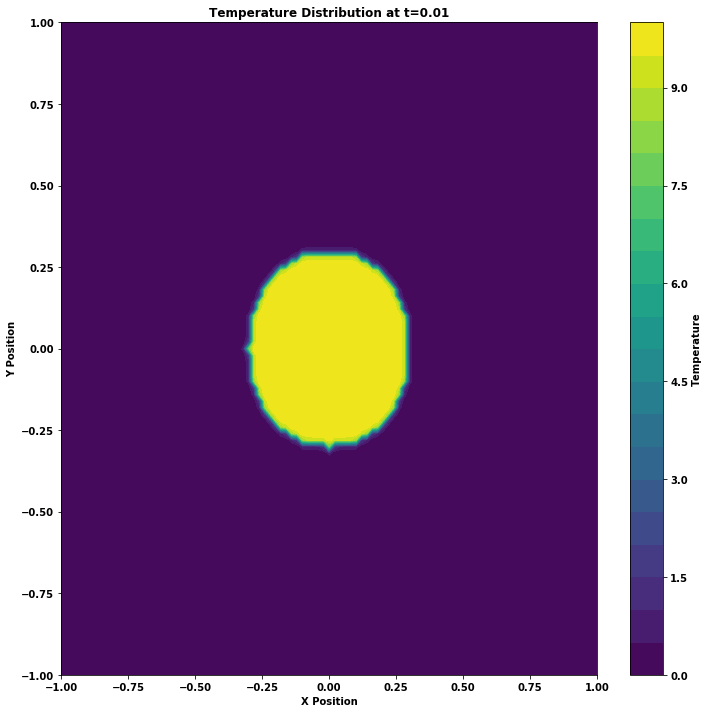

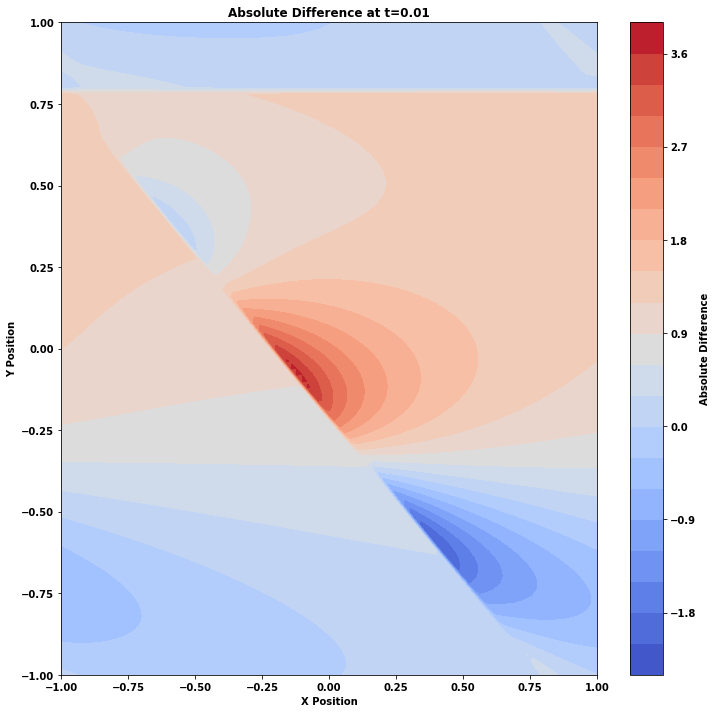

In [60]:
t_idx = 10


plt.figure(figsize=(12, 12))
plt.contourf(X[:, :, t_idx], Y[:, :, t_idx], u[t_idx, :], levels=20, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Temperature Distribution at t={t_idx * dt:.2f}')
plt.show()

# Create contour plot for absolute difference
plt.figure(figsize=(12, 12))
plt.contourf(X[:, :, t_idx], Y[:, :, t_idx], fitted_values[t_idx, :], levels=20, cmap='coolwarm')  # Corrected plot
plt.colorbar(label='Absolute Difference')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Absolute Difference at t={t_idx * dt:.2f}')
plt.show()

c:\Program Files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


10
10


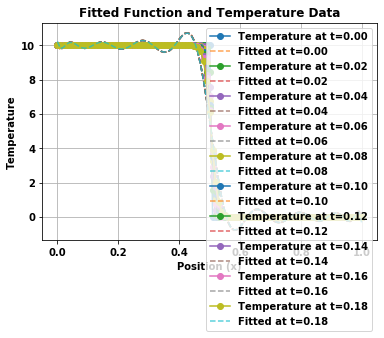

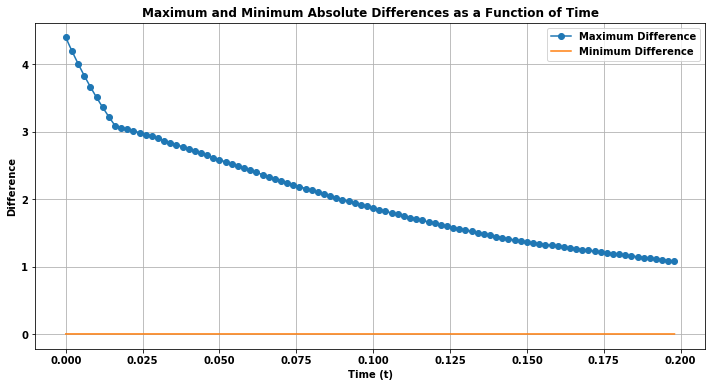

In [267]:
import numpy as np
from findiff import FinDiff
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Fourier model
def Fourier(x, t, An, Bn, R, alpha):
    D = alpha  # Using alpha from the fit
    r = np.sqrt(x**2)
    model = An[0]
    n_terms = len(Bn)
    for n in range(1, n_terms):
        model += (
            Bn[n] * np.sin((np.pi * n) / R * r) + An[n] * np.cos((np.pi * n) / R * r)
        ) * np.exp(-((np.pi * n) / R) ** 2 * D * t)
    return model

# Fitting function to apply Fourier across space-time
def fit_temperature_function(XT, alpha, *params):
    n_terms = len(params) // 2  # Assuming Bn and An are of the same length
    Bn = params[:n_terms]
    An = params[n_terms:]
    R = 1  # Characteristic radius
    x, t = XT  # Decompose the spatial-temporal input
    return np.array([Fourier(x_i, t_i, An, Bn, R, alpha) for x_i, t_i in zip(x, t)])

# Parameters for data generation
L = 1.0  # Domain length
Nx = 101  # Spatial grid points
x = np.linspace(0, L, Nx)  # Spatial grid

T = 0.2  # Simulation time
Nt = 100  # Time steps
dt = T / Nt  # Time-step size
alpha = 1e-3  # Diffusion coefficient

# Top-hat initial condition
step_point = 0.5  # Step position
after_step_value = 10  # Temperature after the step
before_step_value = 0  # Temperature before the step

# Create initial condition
u0 = np.zeros(Nx)
mask = (x <= step_point)  # Points where step occurs
u0[mask] = after_step_value  # Set step values

# Simulate heat diffusion
u = np.zeros((Nt, Nx))
u[0, :] = u0  # Set initial condition

# Finite difference spatial operator
d_xx = FinDiff(0, L / (Nx - 1), 2)

# Time-stepping loop for heat equation
for n in range(1, Nt):
    u_xx = d_xx(u[n - 1, :])
    u[n, :] = u[n - 1, :] + alpha * dt * u_xx  # Euler step

# Prepare data for curve fitting
X, T = np.meshgrid(x, np.arange(0, Nt) * dt)  # Spatial-temporal grid
XT = np.array([X.flatten(), T.flatten()])  # Flattened input data
temperature_data = u.flatten()  # Flattened temperature data

# Initial guesses for parameters
alpha_guess = 1e-3  # Diffusion coefficient guess
Bn_guess = np.ones(10)  # Initial guess for sine coefficients
An_guess = np.ones(10)  # Initial guess for cosine coefficients
initial_guesses = np.concatenate(([alpha_guess], An_guess, Bn_guess))

# Perform curve fitting
popt, _ = curve_fit(fit_temperature_function, XT, temperature_data, p0=initial_guesses)

# Extract optimal parameters
alpha_opt, *coefficients = popt
n_terms = len(coefficients) // 2
An_opt = coefficients[:n_terms]
Bn_opt = coefficients[n_terms:]
print(len(An_opt))
print(len(Bn_opt))

# Calculate the fitted values for reshaping
fitted_values = fit_temperature_function(XT, alpha_opt, *coefficients).reshape(Nt, Nx)

# Compute the maximum and minimum absolute differences as a function of time
max_diffs = [np.max(np.abs(fitted_values[n, :] - u[n, :])) for n in range(Nt)]
min_diffs = [np.min(np.abs(fitted_values[n, :] - u[n, :])) for n in range(Nt)]

# Plot the maximum and minimum differences as a function of time



for t_idx in range(0, Nt, 10):
    plt.plot(x, u[t_idx, :], 'o-', label=f'Temperature at t={t_idx * dt:.2f}')
    plt.plot(x, fitted_values[t_idx, :], '--', label=f'Fitted at t={t_idx * dt:.2f}', alpha=0.7)

plt.xlabel('Position (x)')
plt.ylabel('Temperature')
plt.title('Fitted Function and Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(np.arange(Nt) * dt, max_diffs, '-o', label='Maximum Difference')
plt.plot(np.arange(Nt) * dt, min_diffs, '-', label='Minimum Difference')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Maximum and Minimum Absolute Differences as a Function of Time')
plt.legend()
plt.grid(True)
plt.show()

In [184]:
alpha_opt, *coefficients = popt
n_terms = len(coefficients) // 2
An_opt = coefficients[:n_terms]
Bn_opt = coefficients[n_terms:]
print(len(coefficients))
print(len(An_opt))
print(len(Bn_opt))


20
10
10


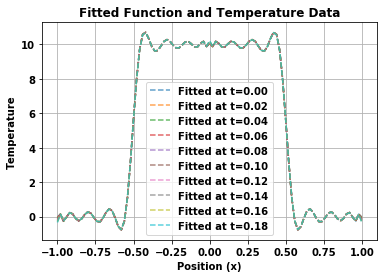

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [268]:

x = np.linspace(-L, L, Nx)

X, T = np.meshgrid(x, np.arange(0, Nt) * dt)  # Spatial-temporal grid
XT = np.array([X.flatten(), T.flatten()])



fitted_values = fit_temperature_function(XT, alpha_opt, *coefficients).reshape(Nt, Nx)

# Compute the maximum and minimum absolute differences as a function of time
max_diffs = [np.max(np.abs(fitted_values[n, :] - u[n, :])) for n in range(Nt)]
min_diffs = [np.min(np.abs(fitted_values[n, :] - u[n, :])) for n in range(Nt)]

# Plot the maximum and minimum differences as a function of time



for t_idx in range(0, Nt, 10):
    # plt.plot(x, u[t_idx, :], 'o-', label=f'Temperature at t={t_idx * dt:.2f}')
    plt.plot(x, fitted_values[t_idx, :], '--', label=f'Fitted at t={t_idx * dt:.2f}', alpha=0.7)

plt.xlabel('Position (x)')
plt.ylabel('Temperature')
plt.title('Fitted Function and Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

# plt.plot(np.arange(Nt) * dt, max_diffs, '-o', label='Maximum Difference')
# plt.plot(np.arange(Nt) * dt, min_diffs, '-', label='Minimum Difference')

# plt.xlabel('Time (t)')
# plt.ylabel('Difference')
# plt.title('Maximum and Minimum Absolute Differences as a Function of Time')
# plt.legend()
# plt.grid(True)
# plt.show()

-38651.623 + (72063.478 * sin((pi * 1) / 1.000 * r(x)) + 13584.380 * cos((pi * 1) / 1.000 * r(x))) * exp(-0.001 * ((pi * 1) / 1.000)**2 * t) + (-22073.975 * sin((pi * 2) / 1.000 * r(x)) + 58244.573 * cos((pi * 2) / 1.000 * r(x))) * exp(-0.001 * ((pi * 2) / 1.000)**2 * t) + (-40571.986 * sin((pi * 3) / 1.000 * r(x)) + -23292.140 * cos((pi * 3) / 1.000 * r(x))) * exp(-0.001 * ((pi * 3) / 1.000)**2 * t) + (18697.212 * sin((pi * 4) / 1.000 * r(x)) + -24084.128 * cos((pi * 4) / 1.000 * r(x))) * exp(-0.001 * ((pi * 4) / 1.000)**2 * t) + (11959.633 * sin((pi * 5) / 1.000 * r(x)) + 11833.295 * cos((pi * 5) / 1.000 * r(x))) * exp(-0.001 * ((pi * 5) / 1.000)**2 * t) + (-5870.297 * sin((pi * 6) / 1.000 * r(x)) + 4819.885 * cos((pi * 6) / 1.000 * r(x))) * exp(-0.001 * ((pi * 6) / 1.000)**2 * t) + (-1496.813 * sin((pi * 7) / 1.000 * r(x)) + -2200.394 * cos((pi * 7) / 1.000 * r(x))) * exp(-0.001 * ((pi * 7) / 1.000)**2 * t) + (568.858 * sin((pi * 8) / 1.000 * r(x)) + -323.697 * cos((pi * 8) / 1.000 

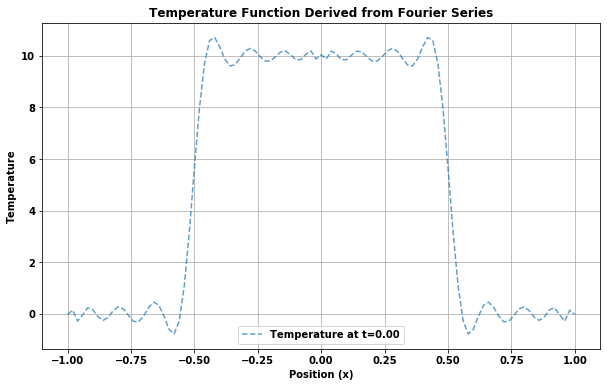

In [276]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier series as a string
def temperature_function_to_string(x, t, An, Bn, R, alpha):
    """
    Constructs a string representation of a Fourier-based temperature function with given coefficients.
    """
    series_str = f"{An[0]:.3f}"
    n_terms = len(Bn)
    for n in range(1, n_terms):
        sin_term = f"{Bn[n]:.3f} * sin((pi * {n}) / {R:.3f} * r(x))"
        cos_term = f"{An[n]:.3f} * cos((pi * {n}) / {R:.3f} * r(x))"
        decay_term = f"exp(-{alpha} * ((pi * {n}) / {R:.3f})**2 * t)"
        term_str = f"({sin_term} + {cos_term}) * {decay_term}"
        series_str += " + " + term_str
    return series_str

# Function to create a lambda function from a string
def create_function_from_string(equation_str):
    """
    Converts a string representation of a mathematical expression into a lambda function.
    """
    math_context = {
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "pi": np.pi,
        "sqrt": np.sqrt,
        "r": lambda x: np.sqrt(x**2)  # Radial distance from `x`
    }
    
    func = eval(f"lambda x, t: {equation_str}", math_context)  # Lambda with `x` and `t`
    return func

# Fourier coefficients (example values)
R = 1.0  # Characteristic length

x = np.linspace(-L, L, Nx)
# Create the Fourier series string and lambda function
t_value = 0  # Fixed time value
fourier_str = temperature_function_to_string(x, t_value, Bn_opt, An_opt, R, alpha_opt) 
print(fourier_str) # String representation
temperature_function = create_function_from_string(fourier_str)  # Lambda function

# Evaluate the function over a range of `x` values
# x_values = np.linspace(0, 1, 101)  # Range of `x` values

# Compute temperature values over the `x` range
temperature_results = [temperature_function(x, t_value) for x in x]

# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(x, temperature_results, '--', alpha=0.7, label=f'Temperature at t={t_value:.2f}')
plt.xlabel('Position (x)')
plt.ylabel('Temperature')
plt.title('Temperature Function Derived from Fourier Series')
plt.legend()
plt.grid(True)
plt.show()



1.4142135623730951


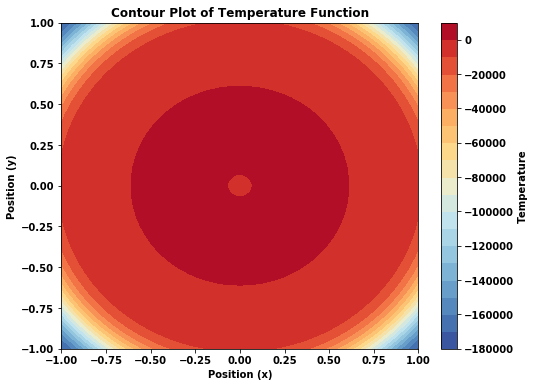

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
cmps = tc.tol_cmap("sunset")

# Create a grid of x and y values
x_values = np.linspace(-1, 1, 101)  # Positions from -1 to 1
y_values = np.linspace(-1, 1, 101)

# Create a meshgrid from x and y values
X, Y = np.meshgrid(x_values, y_values)

# Compute radial distance `r`
R = np.sqrt(X**2 + Y**2)
print(np.max(R))

# Evaluate the temperature function at each (x, y) point with a fixed `t`
t =10  # Example time
Z = np.array([temperature_function(r, t) for r in R] )

# Create a filled contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap=cmps)  # 20 contour levels

# Add a color bar to show temperature levels
plt.colorbar(contour, label='Temperature')

# Label axes
plt.title('Contour Plot of Temperature Function')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')

# Display the plot
plt.show()

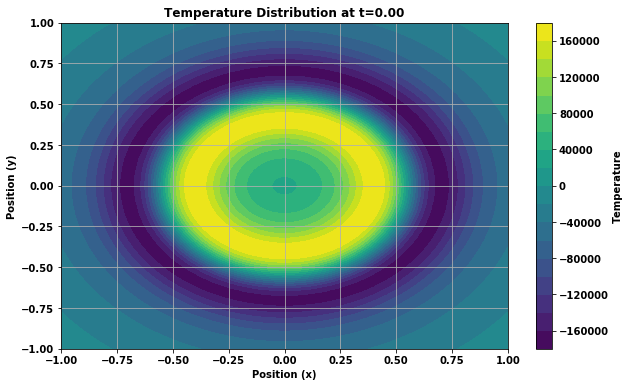

In [274]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier series as a string
def temperature_function_to_string(x, y, t, An, Bn, R, alpha):
    """
    Constructs a string representation of a Fourier-based temperature function with given coefficients.
    """
    series_str = f"{An[0]:.3f}"
    n_terms = len(Bn)
    for n in range(1, n_terms):
        r_component = "sqrt(x**2 + y**2)"  # Radial distance
        sin_term = f"{Bn[n]:.3f} * sin((pi * {n}) / {R:.3f} * r(x,y))"
        cos_term = f"{An[n]:.3f} * cos((pi * {n}) / {R:.3f} * r(x,y))"
        decay_term = f"exp(-{alpha} * ((pi * {n}) / {R:.3f}) ** 2 * t)"
        term_str = f"({sin_term} + {cos_term}) * {decay_term}"
        series_str += " + " + term_str
    return series_str

# Function to create a lambda function from a string
def create_function_from_string(equation_str):
    """
    Converts a string representation of a mathematical expression into a lambda function.
    """
    math_context = {
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "pi": np.pi,
        "sqrt": np.sqrt,
        "r": lambda x, y: np.sqrt(x**2 + y**2)  # Radial distance for `x` and `y`
    }
    
    func = eval(f"lambda x, y, t: {equation_str}", math_context)  # Lambda with `x`, `y`, `t`
    return func

# Fourier coefficients and other parameters
R = 1.0  # Characteristic length
alpha_opt = 1e-3  # Diffusion coefficient
# An_opt = [1.0, 0.5, 0.2]  # Example cosine coefficients
# Bn_opt = [0.5, 0.3, 0.1]  # Example sine coefficients

# Create the Fourier series string with the correct arguments
t_value = 0  # Fixed time value
fourier_str = temperature_function_to_string(0, 0,0,  An_opt, Bn_opt, R, alpha_opt)  # Corrected string representation
temperature_function = create_function_from_string(fourier_str)  # Lambda function from the string

# Generate spatial grid and evaluate the function over 2D grid
L = 1.0  # Domain length
Nx = 101  # Number of spatial grid points
x_values = np.linspace(-L, L, Nx)  # Spatial grid for `x`
y_values = np.linspace(-L, L, Nx)  # Spatial grid for `y`
X, Y = np.meshgrid(x_values, y_values)  # Generate meshgrid

# Compute temperature results over 2D grid
temperature_results = np.array(
    [[temperature_function(x, y, t_value) for x in x_values] for y in y_values]
)

# Plot a contour plot to visualize the temperature distribution
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, temperature_results, levels=20, cmap='viridis')  # Filled contour plot
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')
plt.title(f'Temperature Distribution at t={t_value:.2f}')
plt.grid(True)
plt.show()



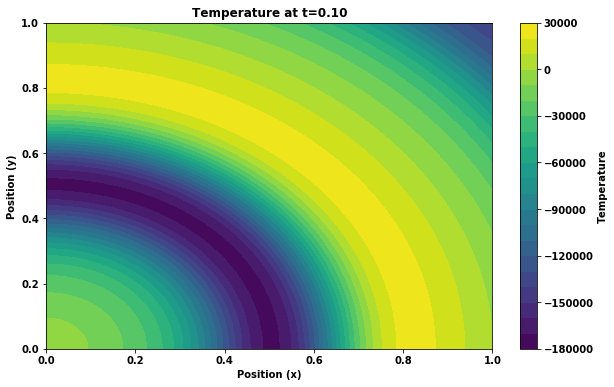

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier series as a string
def fourier_series_to_string(x, t, An, Bn, R, alpha):
    """
    Constructs a string representation of a Fourier-based temperature function with given coefficients.
    """
    series_str = f"{An[0]:.3f}"
    n_terms = len(Bn)
    for n in range(1, n_terms):
        # Radial component `r`
        r_component = f"sqrt(x**2 + y**2)"  
        sin_term = f"{Bn[n]:.3f} * sin({(np.pi * n) / R:.3f} * {r_component})"
        cos_term = f"{An[n]:.3f} * cos({(np.pi * n) / R:.3f} * {r_component})"
        decay_term = f"exp(-{alpha} * {((np.pi * n) / R) ** 2:.3f} * t)"
        term_str = f"({sin_term} + {cos_term}) * {decay_term}"
        series_str += " + " + term_str
    return series_str

# Function to create a lambda function from a string
def create_function_from_string(equation_str):
    """
    Converts a string representation of a mathematical expression into a lambda function
    that can be used for evaluation.
    """
    math_context = {
        "sin": np.sin,
        "cos": np.cos,
        "exp": np.exp,
        "pi": np.pi,
        "sqrt": np.sqrt,
        "r": lambda x, y: np.sqrt(x**2 + y**2)  # 2D radial distance
    }
    
    func = eval(f"lambda x, y, t: {equation_str}", math_context)
    return func

# Parameters for the Fourier series (example values)
alpha = 1e-3  # Diffusion coefficient
R = 1.0  # Characteristic length
An = [1.0, 0.5, 0.2]  # Cosine coefficients
Bn = [0.5, 0.3, 0.1]  # Sine coefficients

# Create the Fourier series string
fourier_str = fourier_series_to_string(0, 0, Bn_opt, An_opt, R, alpha)

# Create a lambda function from the string
temperature_function = create_function_from_string(fourier_str)

# Evaluate the function over a range of `x` values with a constant `t` and `y`
x_values = np.linspace(0, 1, 101)  # Range of `x` values
y_values = np.linspace(0, 1, 101)  # Range of `y` values
t_value = 0.1  # Fixed time value

# Compute temperature values for each `x` and `y`
temperature_results = np.array([
    [temperature_function(x, y, t_value) for x in x_values] 
    for y in y_values
])

# Plot a heatmap or contour plot
plt.figure(figsize=(10, 6))
plt.contourf(x_values, y_values, temperature_results, levels=20, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')
plt.title(f'Temperature at t={t_value:.2f}')
plt.show()

No handles with labels found to put in legend.


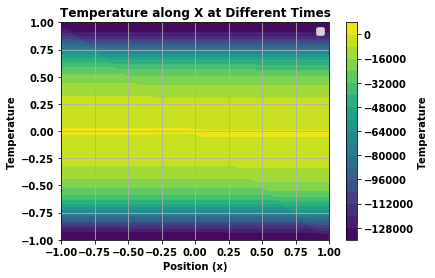

In [143]:
t_idx = 0
plt.contourf(X[:, :, t_idx], Y[:, :, t_idx], fitted_values[t_idx, :], levels=20, cmap='viridis')
plt.xlabel('Position (x)')
plt.ylabel('Temperature')
plt.title('Temperature along X at Different Times')
plt.colorbar(label='Temperature')
plt.legend()
plt.grid(True)
plt.show()